<a href="https://colab.research.google.com/github/kentokura/python_medical_images/blob/master/chapter3/chap3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第 3 章 Pythonを使って画像処理の基本を理解する

## この章では?

OpenCV(Open Soure Computer Vision Library) を用います。理由は以下のとおり。

- 実装済みの基本的なコードを再利用することで、「車輪の再発明」を回避できる点。
- 使用した創作物は商用利用可能な点。
- 多くの人が利用しやすい点。
  - オープンソースであり、Windows, MacOS, Linuxで動作する。
  - ソースコードはC/C++で書かれており、Python, Matlab, Java, JavaScript, Rubyなどの言語からこのコードが利用できるようにインターフェースが作成されている。すげー！！！

※ オープンソースとは？  
制作者が指定したライセンスに則りソースコードが公開されているプログラム


### 【学習の準備】
あらかじめGDriveのマイドライブに「dataset」と「colab notebooks」をアップロードする。

GDriveのマウント

colabノートブックからGドライブのデータにアクセスする。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 3.1 ピクセルから始める

次の処理を学ぶ
- 画像内のピクセル位置を取得してピクセル値を取得する
- 画像の大きさを調べる

### 3.1.1 ピクセル

プログラムから画像を表示する方法

リスト 3.1.1 画像の表示

●imageの実態は <class 'numpy.ndarray'> です
[[29 30 31 ... 33 33 33]
 [28 30 31 ... 33 33 33]
 [28 29 30 ... 33 33 33]
 ...
 [31 32 32 ... 30 30 31]
 [30 31 31 ... 30 31 32]
 [29 30 30 ... 31 31 33]]

●imageの表示


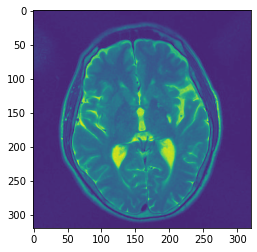

In [16]:
import cv2 # opencvのインポート
import matplotlib.pyplot as plt
import numpy as np

# イメージの読み込み
image=cv2.imread(filename='/content/drive/My Drive/DATASET/dataset/MR_LEE_IR87a.jpg',
                 flags=cv2.IMREAD_GRAYSCALE)
print("●imageの実態は",type(image),"です")
print(image)
print()

# 画像の表示
print("●imageの表示")
plt.imshow(image)

memo
MRIの撮像方法

MRI(MRと略すことが多い)


・一般的
- スピンエコー法
- グラジエントエコー法

スピンエコー法とは、90°パルスというラジオ波を対象に打ち、180°を打ち、1ラインを取得する。これを繰り返す。

・インバージョンリカバリー法(IR法)
スピンエコー法の前に、180°を打つ。すると、脂肪の信号が消える時間帯がある。すると、脂を抑制できる。水も同様の方法で抑制できる。

MR_LEE_IR87a.jpgのIRはおそらくここからきてる。(放射線技師見習い友達曰く)

写真の見せ方
- t1強調画像 t1値を強調する
- t2強調画像 t2値を強調する

これはt2強調画像。水が高信号でうつる。今回でいうと黄色い部分。
脳には脳脊髄液がある。それの通り道なんかが更新豪で移る。
下に明るく２と映っている箇所は、側脳室だと思われる。そこで脳脊髄液が作られる。
また、脳には灰白質と白質がある。白質には神経がある。灰白質には神経の末端がある。
画像の濃いブルーと薄いブルーがある。濃いブルーが白質で、薄いブルーが灰白質。

t1は縦緩和時間のこと。
t2は横緩和時間のこと。

t1強調画像では灰白質より白質が高信号で移る。つまり水は低信号で移る。

t1強調画像では、t1値が短い物質が高信号で移る。**だから**水が高信号で移る。

t1強調画像では、t1値が長い物質が高信号で移る。**だから**水が低信号で移る。

### 3.1.2 ピクセルへのアクセス

画像の原点は左上となる。
画像の数学的表記`f(x,y)`

**輝度**は**きど**と読む。


`

リスト 3.1.2 ピクセルへのアクセス

In [18]:
x = 100
y = 100
pixVal = image[x-1, y-1]
print(pixVal) # ピクセル地を出力して確かめる

70


### 3.1.3 マトリクスサイズ

画像の大きさはぴくsるの行列の大きさを示す「マトリクスサイズ」で表される。同じ範囲を撮影した画像ではマトリクスサイズが置き位ほど画像を構成するピクセル数が増えるため一般に空間分解能が良くなる。

リスト 3.1.3 マトリクスサイズの確認

In [19]:
height, width = image.shape
# height, width, channels = image.shape # カラー画像の場合は受け手の変数が異なる
print(width, height, 'マトリクスサイズ(幅, 高さ)')

320 320 マトリクスサイズ(幅, 高さ)


In [22]:
print(type(image.shape))
hoge = image.shape
print(hoge)

<class 'tuple'>
(320, 320)


### 3.1.4 ボクセル

ピクセルが2次元画像の構成要素であることに対し、ボクセルとは3次元画像データの構成要素である。